## Final Project Submission

Please fill out:
* Student name: Christopher Woo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#dropping id, lat, long column because they are unnecessary
df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [7]:
#start taking care of NAN values
df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
df['waterfront'].isna().sum()

2376

In [9]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [10]:
##replace all NaN waterfront values with zero
df['waterfront'] = df['waterfront'].fillna(value=0)

In [11]:
df['view'].isna().sum()

63

In [12]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [13]:
##replace all NaN view values with zero
df['view'] = df['view'].fillna(value=0)

In [14]:
df['yr_renovated'].isna().sum()

3842

In [15]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [16]:
## change yr_renovated to a categorical variable by changing values to 0 or 1 based on whether or not house has been renovated
## also changing NaN values to 0
df['yr_renovated'] = df['yr_renovated'].fillna(value=0)

df['yr_renovated'] = df['yr_renovated'].map(lambda x: 0 if x == 0 else 1)

In [17]:
## change column name to renovated because the year is gone
df.rename(columns = {'yr_renovated':'renovated'}, inplace=True)

In [18]:
df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
renovated        False
zipcode          False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [19]:
## deal with any duplicate data
len(df[df.duplicated()])

0

In [20]:
## create a new column for the age of the house

for x in range(0, 21597):
    df['yr_sold'] = df['date'][x][-4:]

df['yr_sold'] = df['yr_sold'].astype(int)

## age of house is year it was sold minus year it was built
df['age'] =  df['yr_sold'] - df['yr_built']

In [21]:
##removing date and yr_built columns
df.drop(['date', 'yr_built', 'yr_sold'], axis=1, inplace=True)

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,renovated,zipcode,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,0,98178,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1,98125,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,0,98028,2720,8062,81
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,0,98136,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,0,98074,1800,7503,27


In [23]:
## sqft_above and sqft_basement variables seem to be equal to sqft_living variable, so checking to see if that is true

for x in range(0, 21597):
    if df['sqft_basement'][x] == '?':
        df['sqft_basement'][x] = df['sqft_living'][x] - df['sqft_above'][x]

df['sqft_basement'] = df['sqft_basement'].astype(float)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
df.loc[df['sqft_living'] != df['sqft_above'] + df['sqft_basement']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,renovated,zipcode,sqft_living15,sqft_lot15,age


In [25]:
## get rid of sqft_above and sqft_basement columns because they are redundant with sqft_living
df.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)

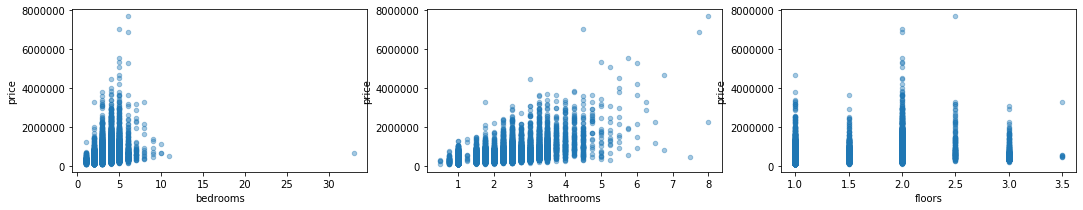

In [26]:
## figuring out which variables are categorical using scatterplot graphs

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

In [27]:
df['bedrooms'].max()

33

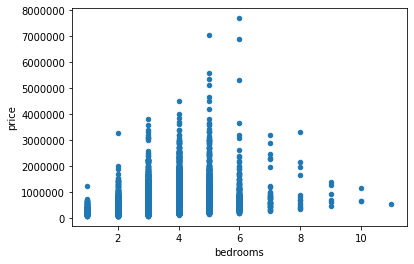

In [28]:
## removing the outlier for bedroom

df.drop(df.loc[df['bedrooms'] == 33].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.plot(kind='scatter', x='bedrooms', y='price');

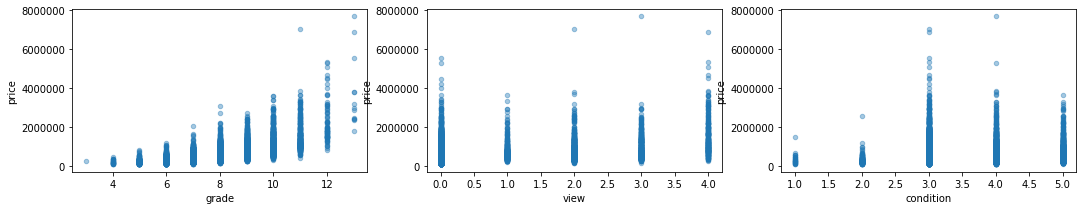

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))

for xcol, ax in zip(['grade', 'view', 'condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

In [91]:
df['grade'].describe()

count    21596.000000
mean         7.657946
std          1.173218
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

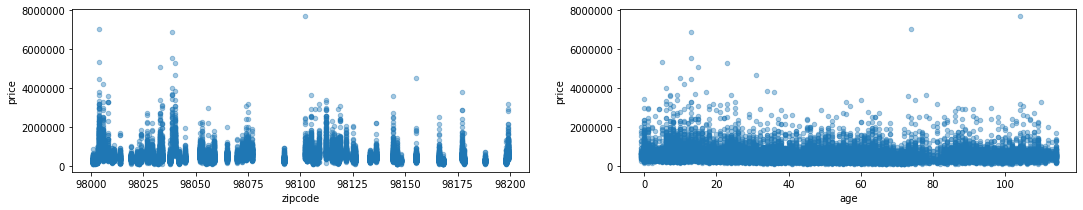

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 3))

for xcol, ax in zip(['zipcode', 'age'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

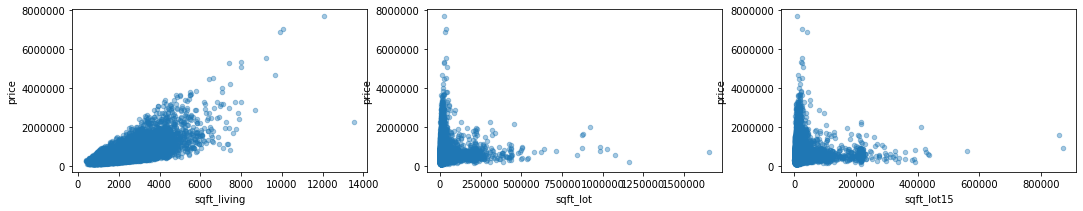

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

In [32]:
## create dummy variables for categorical variables

floor_dummy = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
grade_dummy = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
view_dummy = pd.get_dummies(df['view'], prefix='view', drop_first=True)
cond_dummy = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

In [33]:
clean_data = df.drop(['floors', 'grade', 'view', 'condition'], axis=1)

In [34]:
clean_data = pd.concat([clean_data, view_dummy, floor_dummy, grade_dummy, cond_dummy], axis=1)
clean_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,renovated,zipcode,sqft_living15,sqft_lot15,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,cond_2,cond_3,cond_4,cond_5
0,221900.0,3,1.00,1180,5650,0.0,0,98178,1340,5650,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,0.0,1,98125,1690,7639,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,0.0,0,98028,2720,8062,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,0.0,0,98136,1360,5000,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,0.0,0,98074,1800,7503,...,1,0,0,0,0,0,0,1,0,0


In [35]:
## dealing with zip code variable

df['zipcode'].describe()

count    21596.000000
mean     98077.950685
std         53.514040
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

Looking at a map of Washington zipcodes, it looks like all the 98100 zip codes are located in the city of Seattle while the 98000 zip codes are located outside the city of Seattle. Map can be seen here: https://www.kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_westKC_586.ashx?la=en

In [36]:
## change zip code column to a categorical variable named Seattle that describes whether or not the house is located in the 
## city of Seattle

clean_data['zipcode'] = clean_data['zipcode'].map(lambda x: 0 if x < 98100 else 1)
clean_data.rename(columns = {'zipcode':'Seattle'}, inplace=True)

In [37]:
clean_data_cont = clean_data.iloc[:, 1:11]

In [38]:
## checking for highly correlated variables

abs(clean_data_cont.corr()) > 0.8

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,renovated,Seattle,sqft_living15,sqft_lot15,age
bedrooms,True,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False
renovated,False,False,False,False,False,True,False,False,False,False
Seattle,False,False,False,False,False,False,True,False,False,False
sqft_living15,False,False,False,False,False,False,False,True,False,False
sqft_lot15,False,False,False,False,False,False,False,False,True,False
age,False,False,False,False,False,False,False,False,False,True


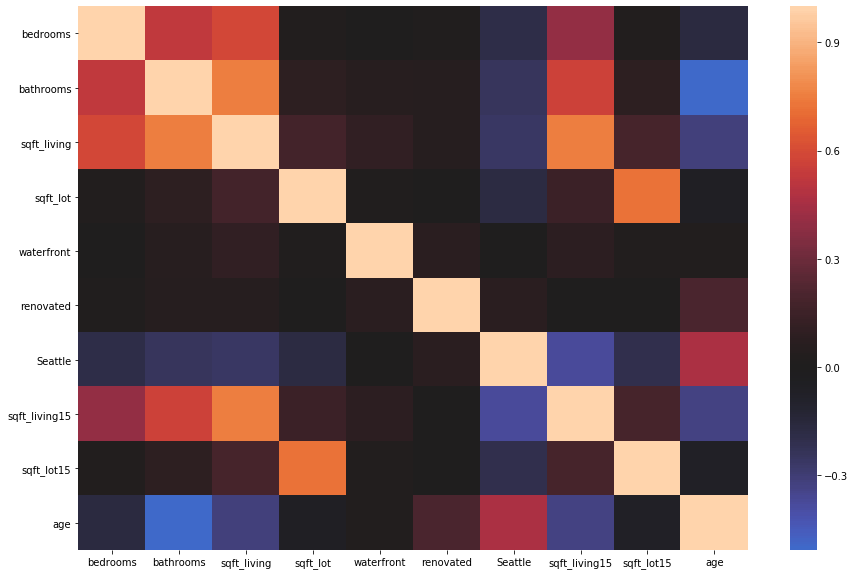

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(clean_data_cont.corr(), center=0);

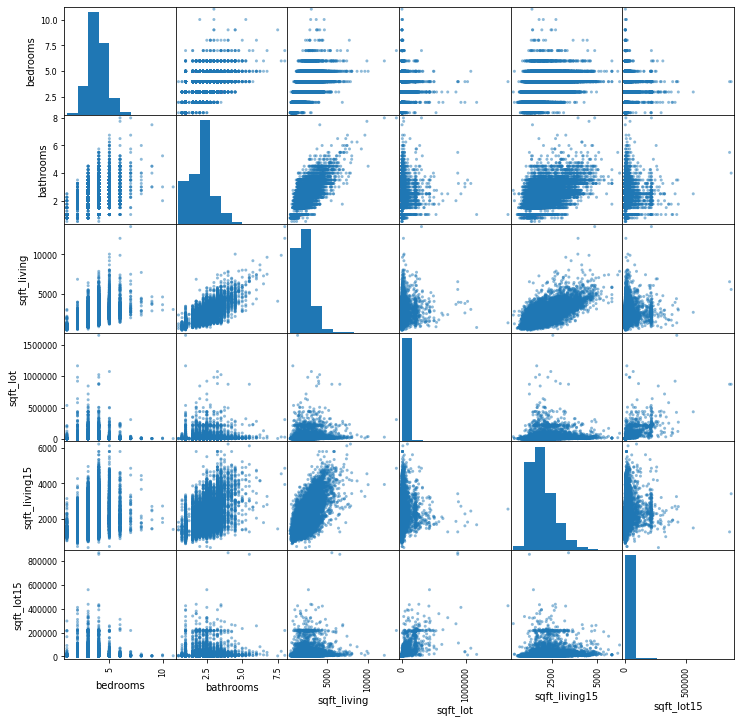

In [40]:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
pd.plotting.scatter_matrix(clean_data[continuous], figsize=(12, 12));

In [41]:
## check to see if variables become more normal after log transformation
check = clean_data.iloc[:, 1:]

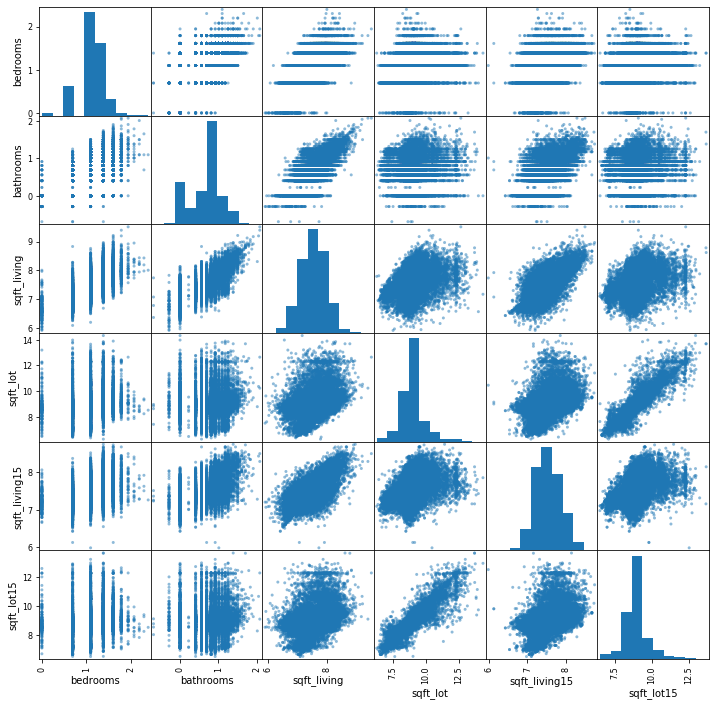

In [42]:
for feat in continuous:
    check[feat] = check[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(check[continuous], figsize=(12, 12));

In [43]:
## log transform variables to make them more normal
clean_data['bedrooms'] = np.log(clean_data['bedrooms'])
clean_data['bathrooms'] = np.log(clean_data['bathrooms'])
clean_data['sqft_living'] = np.log(clean_data['sqft_living'])
clean_data['sqft_lot'] = np.log(clean_data['sqft_lot'])
clean_data['sqft_living15'] = np.log(clean_data['sqft_living15'])
clean_data['sqft_lot15'] = np.log(clean_data['sqft_lot15'])

In [44]:
clean_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,renovated,Seattle,sqft_living15,sqft_lot15,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,cond_2,cond_3,cond_4,cond_5
0,221900.0,1.098612,0.000000,7.073270,8.639411,0.0,0,1,7.200425,8.639411,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,1.098612,0.810930,7.851661,8.887653,0.0,1,1,7.432484,8.941022,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,0.693147,0.000000,6.646391,9.210340,0.0,0,0,7.908387,8.994917,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,1.386294,1.098612,7.580700,8.517193,0.0,0,1,7.215240,8.517193,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1.098612,0.693147,7.426549,8.997147,0.0,0,0,7.495542,8.923058,...,1,0,0,0,0,0,0,1,0,0


In [45]:
## create a multiple regression model with data that has been cleaned up

predictors = clean_data.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(clean_data['price'], predictors_int).fit()
model.summary()

C:\Users\Chris\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1341.
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:41:27   Log-Likelihood:            -2.9533e+05
No. Observations:               21596   AIC:                         5.907e+05
Df Residuals:                   21562   BIC:                         5.910e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.04e+06   2.22e+05     -9.185      0.000   -2.48e+06    -1.6e+06
bedrooms      -4.763e+04   7017.674     -6.788      0.000   -6.14e+04   -3.39e+04
bathrooms      6.683e+04   6742.573      9.912      0.000    5.36e+04       8e+04
sqft_living    2.102e+05   8011.576     26.239      0.000    1.95e+05    2.26e+05
sqft_lot      -4510.8393   4174.131     -1.081      0.280   -1.27e+04    3670.767
waterfront     5.683e+05   2.14e+04     26.578      0.000    5.26e+05     6.1e+05
renovated      7.138e+04   8377.898      8.520      0.000     5.5e+04    8.78e+04
Seattle        5.193e+04   4007.487     12.957      0.000    4.41e+04    5.98e+04
sqft_living15  1.312e+05   7522.844     17.446      0.000    1.16e+05    1.46e+05
sqft_lot15    -2.789e+04   4551.254     -6.128      0.000   -3.68e+04    -1.9e+04
age            2544.5323     85.200     29.865      0.000    2377.534    2711.531
view_1.0       1.111e+05   1.18e+04      9.386      0.000    8.79e+04    1.34e+05
view_2.0       4.894e+04   7174.621      6.821      0.000    3.49e+04     6.3e+04
view_3.0       1.072e+05   9768.610     10.972      0.000     8.8e+04    1.26e+05
view_4.0        2.42e+05   1.49e+04     16.286      0.000    2.13e+05    2.71e+05
floor_1.5     -3850.5320   5589.626     -0.689      0.491   -1.48e+04    7105.550
floor_2.0     -3776.0312   4232.796     -0.892      0.372   -1.21e+04    4520.563
floor_2.5      1.127e+05   1.71e+04      6.591      0.000    7.92e+04    1.46e+05
floor_3.0      6.498e+04   1.02e+04      6.352      0.000    4.49e+04     8.5e+04
floor_3.5       1.64e+05   7.98e+04      2.055      0.040    7585.173    3.21e+05
grade_4       -2.416e+04   2.14e+05     -0.113      0.910   -4.44e+05    3.96e+05
grade_5       -7.393e+04   2.11e+05     -0.350      0.726   -4.88e+05     3.4e+05
grade_6       -5.834e+04   2.11e+05     -0.277      0.782   -4.71e+05    3.55e+05
grade_7       -7516.8881   2.11e+05     -0.036      0.972    -4.2e+05    4.05e+05
grade_8         7.47e+04   2.11e+05      0.354      0.723   -3.38e+05    4.88e+05
grade_9        2.427e+05   2.11e+05      1.151      0.250   -1.71e+05    6.56e+05
grade_10       4.699e+05   2.11e+05      2.228      0.026    5.65e+04    8.83e+05
grade_11       8.082e+05   2.11e+05      3.827      0.000    3.94e+05    1.22e+06
grade_12       1.387e+06   2.12e+05      6.538      0.000    9.71e+05     1.8e+06
grade_13       2.792e+06   2.19e+05     12.746      0.000    2.36e+06    3.22e+06
cond_2         4.053e+04   4.24e+04      0.955      0.340   -4.27e+04    1.24e+05
cond_3         5.564e+04   3.95e+04      1.408      0.159   -2.18e+04    1.33e+05
cond_4         8.599e+04   3.95e+04      2.176      0.030    8520.912    1.63e+05
cond_5          1.28e+05   3.98e+04      3.220      0.001    5.01e+04    2.06e+05
=================================================

In [46]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [47]:
##use stepwise selection to remove variables that have a p value greater than .05

result = stepwise_selection(predictors, clean_data['price'], verbose = True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  view_4.0                       with p-value 0.0
Add  grade_11                       with p-value 0.0
Add  grade_12                       with p-value 0.0
Add  grade_10                       with p-value 0.0
Add  grade_13                       with p-value 0.0
Add  age                            with p-value 1.00626e-289
Add  grade_9                        with p-value 0.0
Add  grade_8                        with p-value 1.85697e-209
Add  waterfront                     with p-value 4.59541e-142
Add  sqft_lot                       with p-value 1.00439e-115
Add  sqft_living15                  with p-value 6.28586e-50
Add  Seattle                        with p-value 4.04282e-56
Add  bathrooms                      with p-value 5.35216e-39
Add  view_3.0                       with p-value 1.08507e-26
Add  grade_7                        with p-value 3.43634e-23
Add  cond_5                         with p-value 3.31273e-22
Add  view_1.0  

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


resulting features:
['sqft_living', 'view_4.0', 'grade_11', 'grade_12', 'grade_10', 'grade_13', 'age', 'grade_9', 'grade_8', 'waterfront', 'sqft_living15', 'Seattle', 'bathrooms', 'view_3.0', 'grade_7', 'cond_5', 'view_1.0', 'renovated', 'cond_4', 'view_2.0', 'floor_3.0', 'floor_2.5', 'bedrooms', 'sqft_lot15']


In [48]:
stepwise_predictors = clean_data[['grade_11', 'waterfront', 'bathrooms', 'age', 'grade_10', 'grade_9', 'sqft_living', 'grade_12', 'grade_13', 'grade_8', 'Seattle', 'sqft_living15', 'view_4.0', 'sqft_lot15', 'view_3.0', 'grade_7', 'view_1.0', 'renovated', 'cond_5', 'view_2.0', 'floor_3.0', 'floor_2.5', 'bedrooms', 'cond_4']]
stepwise_predictors_int = sm.add_constant(stepwise_predictors)
model = sm.OLS(clean_data['price'], stepwise_predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1843.
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:42:20   Log-Likelihood:            -2.9533e+05
No. Observations:               21596   AIC:                         5.907e+05
Df Residuals:                   21571   BIC:                         5.909e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.039e+06   5.86e+04    -34.795      0.000   -2.15e+06   -1.92e+06
grade_11       8.677e+05   1.42e+04     61.232      0.000     8.4e+05    8.95e+05
waterfront     5.675e+05   2.14e+04     26.559      0.000    5.26e+05    6.09e+05
bathrooms      6.626e+04   6647.279      9.968      0.000    5.32e+04    7.93e+04
age            2525.9870     78.393     32.222      0.000    2372.331    2679.643
grade_10       5.295e+05   1.04e+04     50.862      0.000    5.09e+05     5.5e+05
grade_9        3.024e+05   8465.364     35.726      0.000    2.86e+05    3.19e+05
sqft_living    2.086e+05   7859.770     26.540      0.000    1.93e+05    2.24e+05
grade_12       1.449e+06   2.48e+04     58.515      0.000     1.4e+06     1.5e+06
grade_13       2.852e+06   5.97e+04     47.763      0.000    2.74e+06    2.97e+06
grade_8         1.35e+05   6776.028     19.924      0.000    1.22e+05    1.48e+05
Seattle        5.285e+04   3954.477     13.364      0.000    4.51e+04    6.06e+04
sqft_living15  1.312e+05   7494.989     17.507      0.000    1.17e+05    1.46e+05
view_4.0       2.422e+05   1.48e+04     16.322      0.000    2.13e+05    2.71e+05
sqft_lot15     -3.19e+04   2196.585    -14.523      0.000   -3.62e+04   -2.76e+04
view_3.0       1.075e+05   9755.683     11.015      0.000    8.83e+04    1.27e+05
grade_7        5.299e+04   5502.429      9.630      0.000    4.22e+04    6.38e+04
view_1.0       1.118e+05   1.18e+04      9.468      0.000    8.87e+04    1.35e+05
renovated      7.201e+04   8341.239      8.633      0.000    5.57e+04    8.84e+04
cond_5         7.371e+04   5810.382     12.686      0.000    6.23e+04    8.51e+04
view_2.0       4.938e+04   7164.451      6.892      0.000    3.53e+04    6.34e+04
floor_3.0      6.781e+04   9532.617      7.114      0.000    4.91e+04    8.65e+04
floor_2.5      1.158e+05   1.69e+04      6.868      0.000    8.28e+04    1.49e+05
bedrooms      -4.759e+04   6983.355     -6.815      0.000   -6.13e+04   -3.39e+04
cond_4         3.153e+04   3624.445      8.699      0.000    2.44e+04    3.86e+04
==============================================================================
Omnibus:                    14826.789   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891301.244
Skew:                           2.657   Prob(JB):                         0.00
Kurtosis:                      34.021   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
## regression model validation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = clean_data['price']
X = stepwise_predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 211435.60265952043
Test Root Mean Squarred Error: 206809.95166864776


The train and test RMSE values are close in value indicating a good model fit.  
Ran multiple tests to calculate multiple RMSE values and most of them were close in value.

In [87]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=15)
selector = selector.fit(stepwise_predictors, clean_data['price'])

In [88]:
selector.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True, False, False])

Based on the scikit feature ranking with recursive feature elimination, the variables that affect pricing the most are sqft_living, waterfront, and grade. The 24 variables used in the final model account for 67.2% of the variance in price based on our adjusted R-Squared value of 0.672. We can be fairly confident in estimating the price of a home in King County, Washington using this model given the variables that are used in our final model.

<b>Does being in the city of Seattle affect housing pricing significantly?

In [53]:
seattle = clean_data.loc[clean_data['Seattle'] == 1]
not_seattle = clean_data.loc[clean_data['Seattle'] == 0]

In [54]:
seattle['price'].describe()

count    8.972000e+03
mean     5.350739e+05
std      3.405358e+05
min      7.800000e+04
25%      3.370000e+05
50%      4.530000e+05
75%      6.300000e+05
max      7.700000e+06
Name: price, dtype: float64

In [55]:
not_seattle['price'].describe()

count    1.262400e+04
mean     5.440005e+05
std      3.852871e+05
min      8.000000e+04
25%      3.100000e+05
50%      4.500000e+05
75%      6.521818e+05
max      7.060000e+06
Name: price, dtype: float64

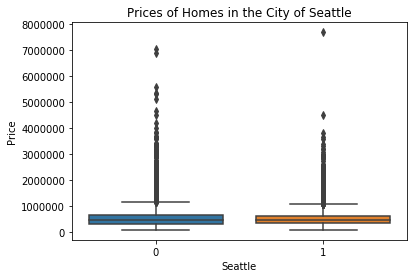

In [74]:
sns.boxplot(x='Seattle', y='price', data=clean_data);
plt.ylabel('Price');
plt.title('Prices of Homes in the City of Seattle');

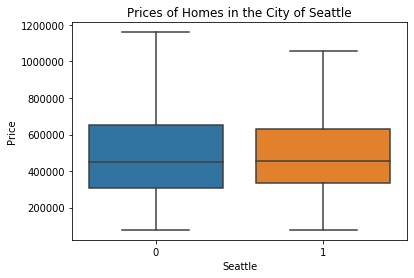

In [75]:
sns.boxplot(x='Seattle', y='price', data=clean_data, showfliers=False)
plt.ylabel('Price');
plt.title('Prices of Homes in the City of Seattle');

Being in the city of Seattle does not seem to have much of an effect on the housing prices in Kings County. We can see that the majority of housing prices do not differ much between houses in Seattle and houses outside of Seattle, with IQR of both falling between 300,000 and 650,000. The median price looks the same for both datasets  with housing prices outside of seattle having more variance. Although the most expensive house is in the city of Seattle, areas outside of Seattle have a greater number of expensive homes.

<b>How does being on the waterfront affect homes

In [58]:
water = df.loc[df['waterfront'] == 1]
not_water = df.loc[df['waterfront'] == 0]

In [59]:
water['price'].describe()

count    1.460000e+02
mean     1.717215e+06
std      1.145385e+06
min      2.850000e+05
25%      8.275000e+05
50%      1.510000e+06
75%      2.282500e+06
max      7.060000e+06
Name: price, dtype: float64

In [60]:
not_water['price'].describe()

count    2.145000e+04
mean     5.322812e+05
std      3.428154e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

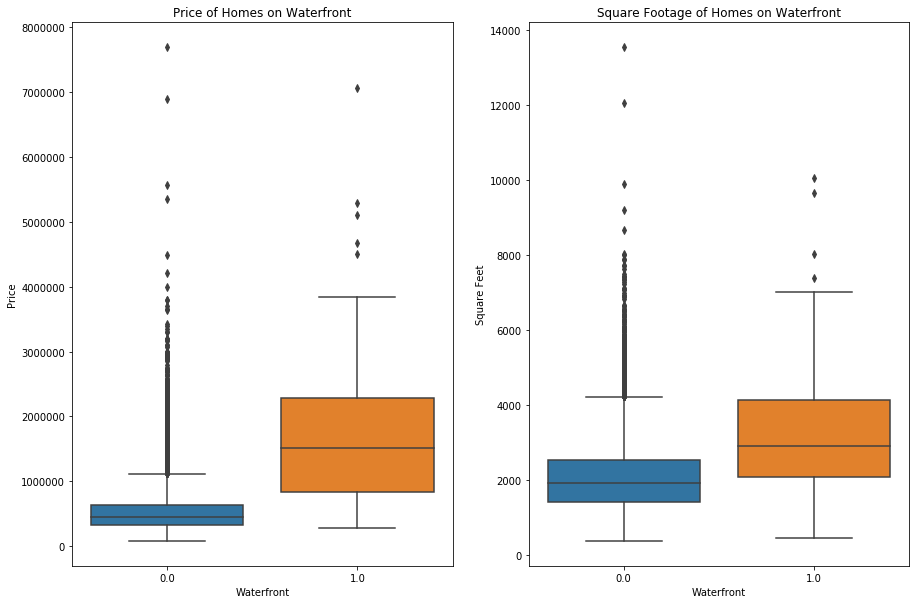

In [86]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x='waterfront', y='price', data=clean_data, ax=ax1);
ax1.set_title('Price of Homes on Waterfront');
plt.xlabel('Waterfront');
plt.ylabel('Price');

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x='waterfront', y='sqft_living', data=df, ax=ax2);
ax2.set_title('Square Footage of Homes on Waterfront');
plt.xlabel('Waterfront');
plt.ylabel('Square Feet');
plt.savefig('waterfront boxplot')

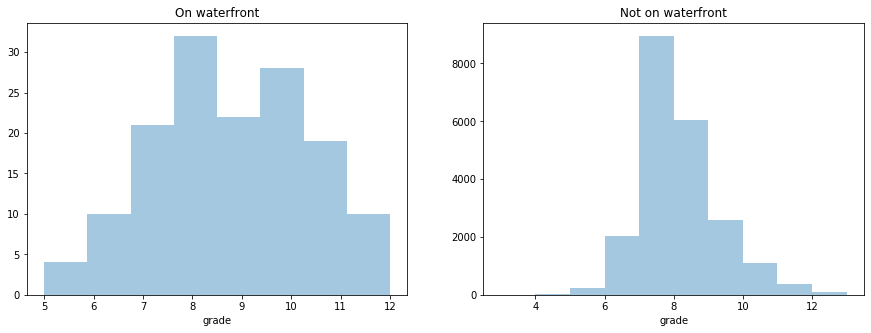

In [62]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
sns.distplot(water['grade'], kde=False, ax=ax1, bins=8);
ax1.set_title('On waterfront');

ax2 = plt.subplot(1, 2, 2)
sns.distplot(not_water['grade'], kde=False, ax=ax2, bins=10);
ax2.set_title('Not on waterfront');

As we can see through these graphs, being on a waterfront has a significant impact on homes. The price of homes on a waterfront are significantly higher than homes that are not, with the lower quartile value of homes on a waterfront being higher than the upper quartile value of homes not on a waterfront. This means that the top 75% of all homes on a waterfront are more expensive than the bottom 75% of homes not on a waterfront. The average price of a home on a waterfront is $1.7 million while the average price of a home not on a waterfront is \\$530,000.

With square footage and grade being some of the most significant variables affecting price, it makes sense that the square footage is bigger for homes on a waterfront and the grades are higher. The top 75% of homes on a waterfront have more square footage than the bottom 50% of homes not on a waterfront, with the top 50% of homes on a waterfront having more square footage than the bottom 75% of homes not on a waterfront. Also, looking at the graph for grades, while most of the homes not on a waterfront have grades 7 or 8, most of the homes on a waterfront have grades of 8 or higher.

<b> How does the number of bedrooms and bathrooms affect pricing of homes?

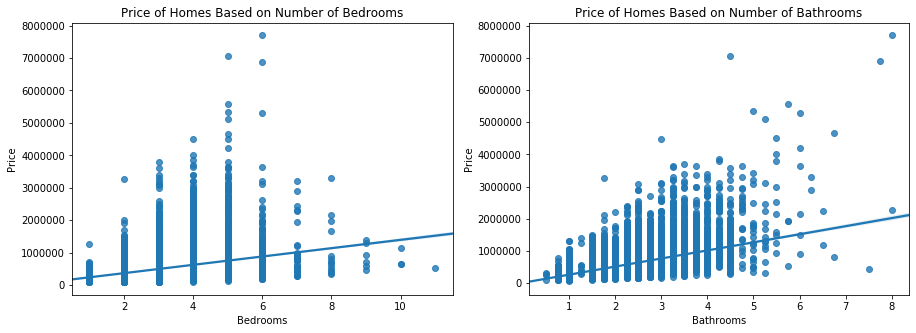

In [76]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
sns.regplot(x=df['bedrooms'], y=df['price']);
ax1.set_title('Price of Homes Based on Number of Bedrooms');
plt.xlabel('Bedrooms');
plt.ylabel('Price');

ax2 = plt.subplot(1, 2, 2)
sns.regplot(x=df['bathrooms'], y=df['price']);
ax2.set_title('Price of Homes Based on Number of Bathrooms');
plt.xlabel('Bathrooms');
plt.ylabel('Price');

In [64]:
## getting the average price of homes based on the number of bedrooms and bathrooms
## I found out later that I could use the barplot function from seaborn to do the same thing but I left this in here
## because I had already written this code

avg_bedroom_price = []
num_bedrooms = df['bedrooms'].unique()
num_bedrooms.sort()

for x in num_bedrooms:
    price = 0
    count = 0
    for y in range(0, len(df['bedrooms'])):
        if df['bedrooms'][y] == x:
            price += df['price'][y]
            count += 1
    avg_bedroom_price.append(price/count)

avg_bathroom_price = []
num_bathrooms = df['bathrooms'].unique()
num_bathrooms.sort()

for x in num_bathrooms:
    price = 0
    count = 0
    for y in range(0, len(df['bathrooms'])):
        if df['bathrooms'][y] == x:
            price += df['price'][y]
            count += 1
    avg_bathroom_price.append(price/count)

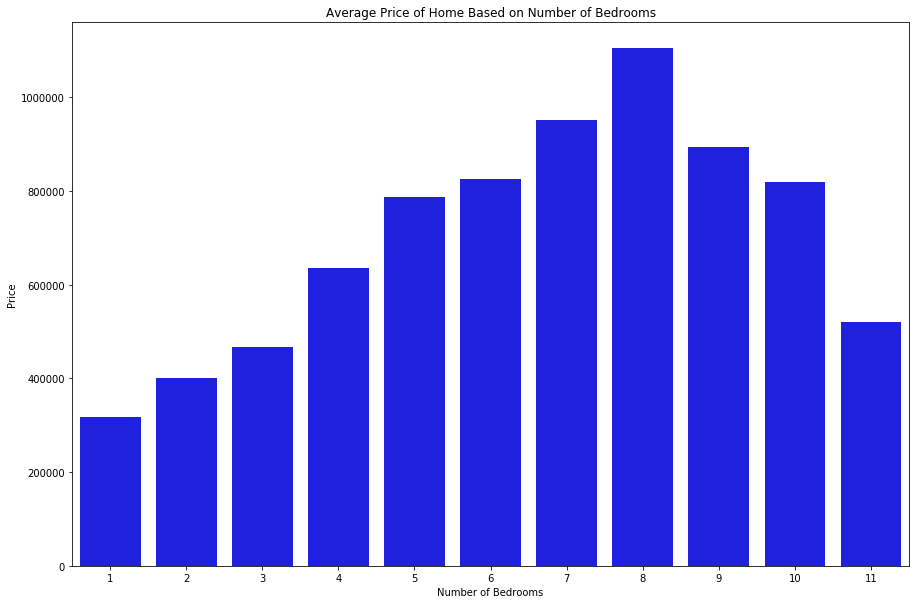

In [77]:
plt.figure(figsize=(15, 10))
sns.barplot(x=num_bedrooms, y=avg_bedroom_price, color='blue');
ax1.set_title('Average Price of Home Based on Number of Bedrooms');
plt.ylabel('Price');
plt.xlabel('Number of Bedrooms');
plt.title('Average Price of Home Based on Number of Bedrooms');

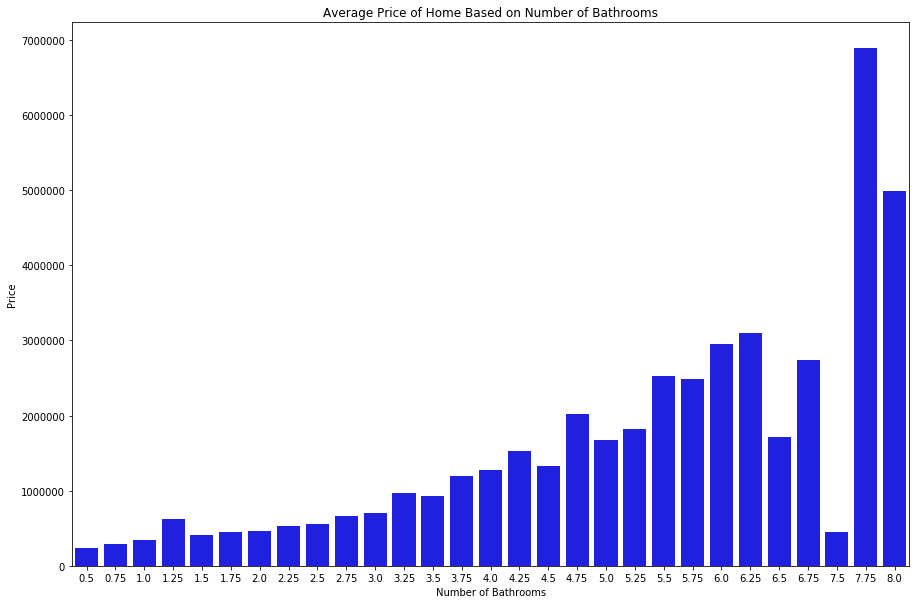

In [78]:
plt.figure(figsize=(15, 10))
sns.barplot(x=num_bathrooms, y=avg_bathroom_price, color='blue');
ax2.set_title('Average Price of Home Based on Number of Bathrooms');\
plt.ylabel('Price');
plt.xlabel('Number of Bathrooms');
plt.title('Average Price of Home Based on Number of Bathrooms');

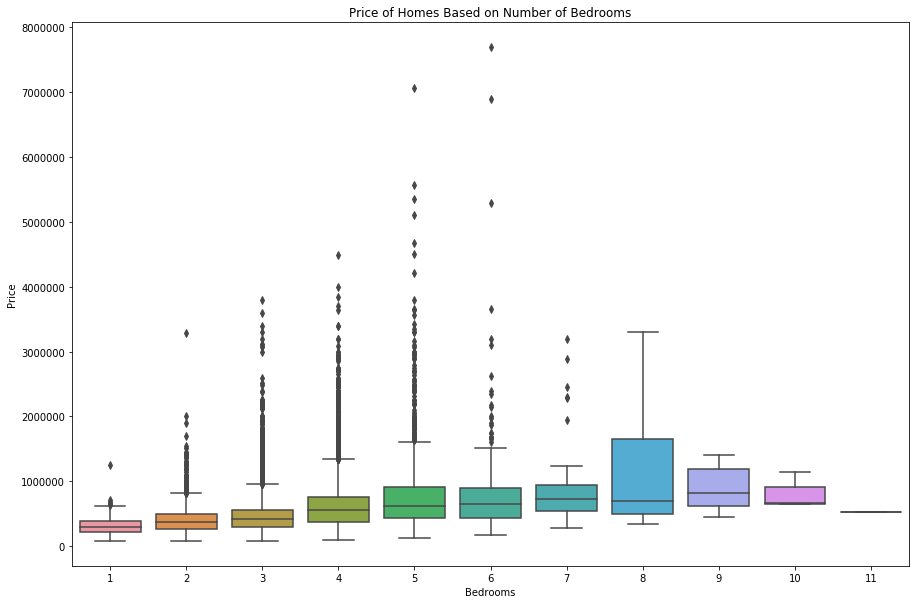

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['bedrooms'], y=df['price']);
plt.xlabel('Bedrooms');
plt.ylabel('Price');
plt.title('Price of Homes Based on Number of Bedrooms');

In [80]:
df.loc[df['bathrooms'] == 7.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated,zipcode,sqft_living15,sqft_lot15,age
8537,450000.0,9,7.5,4050,6504,2.0,0.0,0.0,3,7,0,98144,1448,3866,18


The price of homes steadily increases as you increase the number of both bedrooms and bathrooms. This makes sense as the square footage of the house probably increases the more bedrooms and bathrooms you add. The interesting thing is that the price starts to decrease once you go above 8 bedrooms. This is probably due to the fact that there aren't many houses with 9+ bedrooms and as we can see in the boxplot above, the upper quartile and upper whisker for houses with 8 bedrooms skews the average price up. The median values for houses with 9+ bedrooms seems to be the highest so it is consistent with our conclusion that the price of homes will increase as you increase the number of bedrooms. 

The average price of homes also increases the more bathrooms there are. Unlike bedrooms, the average price consistently increases as you increase the number of bathrooms. There is one house with 7.5 bathrooms and 9 bedrooms that has a surprisingly low price of $450,000 which contributes to why the average price of 9 bedroom homes are lower than 8 bedroom homes. If you exclude that home from the charts, we can confidently say that the price of a home will increase as you increase the number of bedrooms and bathrooms.